# Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Loading the necessary packages. </font>**

In [338]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

**<font color='teal'>  Loading the csv file  created in step 3. </font>**

In [339]:
df=pd.read_csv('./data/step3_EDA_output.csv',index_col=0)
df.head()

,Wind Speed (m/s),Real Power (kW),Wind Direction (⁰),Ambient Temperature (⁰C),Wind Speed 79.1m (m/s),Wind Direction 79.1m (⁰),Air Temp 76.7m (⁰C),Relative Humidity 76.7m (%),Barometric Pressure (mbar),Wind Speed Gradient (m/s),...,Relative Humidity Gradient (%),Ri_B,Summer,Winter,High speed,Low speed,Std. Wind Speed (m/s),TI Wind Speed,Std. Wind Speed 79.1m (m/s),TI Wind Speed 79.1m (m/s)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-08-19 01:00:00,5.556833,214.633333,239.385000,21.40,5.330633,253.377777,20.935833,54.757833,975.052380,1.629017,...,-3.236667,-0.591926,1.0,0.0,0.0,1.0,0.105469,0.018980,0.180488,0.033859
2012-08-19 01:01:00,5.409500,221.266667,240.626667,21.40,5.245217,252.030522,20.909667,55.532667,975.062235,1.730033,...,-3.410167,-0.507177,1.0,0.0,0.0,1.0,0.036473,0.006742,0.202429,0.038593
2012-08-19 01:02:00,5.646833,245.200000,240.248333,21.40,5.581933,253.660155,20.873833,55.137833,974.933405,1.919733,...,-4.813833,-0.558537,1.0,0.0,0.0,1.0,0.105918,0.018757,0.184955,0.033135
2012-08-19 01:03:00,5.718667,253.850000,239.643333,21.28,5.841283,255.637168,20.863000,54.162833,974.981192,1.876100,...,-5.227500,-0.605762,1.0,0.0,0.0,1.0,0.041882,0.007324,0.138177,0.023655
2012-08-19 01:04:00,5.712667,257.216667,240.478333,21.00,5.975533,256.679192,20.882833,53.614000,974.921545,1.785267,...,-5.427500,-0.599312,1.0,0.0,0.0,1.0,0.052299,0.009155,0.100991,0.016901


**<font color='teal'>   Adding square and cube of velocities and inverse of temperature as features. </font>**

A linear model will be tested subsequently. However, from eq 1. $P\propto U^3$ and $\rho\propto 1/T$ both non-linear relationships. To incorporate non-linear effects the higher power of velocity and inverse Temperatures are added as features.

In [340]:
df.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 79.1m (m/s)',
       'Wind Direction 79.1m (⁰)', 'Air Temp 76.7m (⁰C)',
       'Relative Humidity 76.7m (%)', 'Barometric Pressure (mbar)',
       'Wind Speed Gradient (m/s)', 'Wind Direction Gradient (⁰)',
       'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B', 'Summer', 'Winter',
       'High speed', 'Low speed', 'Std. Wind Speed (m/s)', 'TI Wind Speed',
       'Std. Wind Speed 79.1m (m/s)', 'TI Wind Speed 79.1m (m/s)'],
      dtype='object')

In [341]:
df['Square Wind Speed (m/s)^2']=df['Wind Speed (m/s)']*df['Wind Speed (m/s)']
df['Cube Wind Speed (m/s)^3']=df['Square Wind Speed (m/s)^2']*df['Wind Speed (m/s)']

df['Square Wind Speed 79.1m (m/s)^2']=df['Wind Speed 79.1m (m/s)']*df['Wind Speed 79.1m (m/s)']
df['Cube Wind Speed 79.1m (m/s)^3']=df['Wind Speed 79.1m (m/s)']*df['Wind Speed 79.1m (m/s)']

df['Inverse Ambient Temperature (1/⁰C)']=1/df['Ambient Temperature (⁰C)']
df['Inverse Air Temp 76.7m (1/⁰C)']=1/df['Air Temp 76.7m (⁰C)']


**<font color='teal'> Creating a Dataframe with log of features.</font>**

Again from eq. 1, $P\propto product(\rho, U^3,..)$. If a linear model is used, adding log of features will have an equivalent effect of feature products as shown in eq. 7.

In [342]:
#log of negetive temperature may lead to loosing this feature. To avoid the temperatures are converted to Kelvin scale.
df_copy=df

df_copy['Ambient Temperature (⁰C)']=df_copy['Ambient Temperature (⁰C)']+273
df_copy['Air Temp 76.7m (⁰C)']=df_copy['Air Temp 76.7m (⁰C)']+273



df_abs=df_copy.applymap(np.absolute)

In [343]:
df_abs['Summer']=df_abs['Summer']+1
df_abs['Winter']=df_abs['Winter']+1
df_abs['High speed']=df_abs['High speed']+1
df_abs['Low speed']=df_abs['Low speed']+1

df_log=df_abs.applymap(np.log10) 

# Since Ri_B<0 will be modified, loosing its physical meaning, this feature will be dropped. Further, temperatures will also have to dropped

## Standardizing the magnitude of numeric features

In [344]:
x = df.drop(['Real Power (kW)'], axis =1)
y=df['Real Power (kW)']

x_scaled=preprocessing.scale(x, axis=0, with_mean=True, with_std=True, copy=True)

In [345]:
x_scaled.mean(axis=0)

array([ 2.81256500e-16,  5.92118946e-17, -2.25005200e-15, -3.33066907e-17,
       -5.32907052e-16,  2.96059473e-15, -5.92118946e-17, -6.42449057e-15,
        5.92118946e-17,  9.89948864e-17, -5.92118946e-17,  0.00000000e+00,
        2.96059473e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.88178420e-17, -5.92118946e-17, -7.40148683e-17,
       -1.62832710e-16, -2.36847579e-16, -1.48029737e-16, -1.96139401e-16,
       -1.96139401e-16,  5.92118946e-17,  5.92118946e-17])

In [346]:
x_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [347]:
x_scaled.shape

(240, 27)

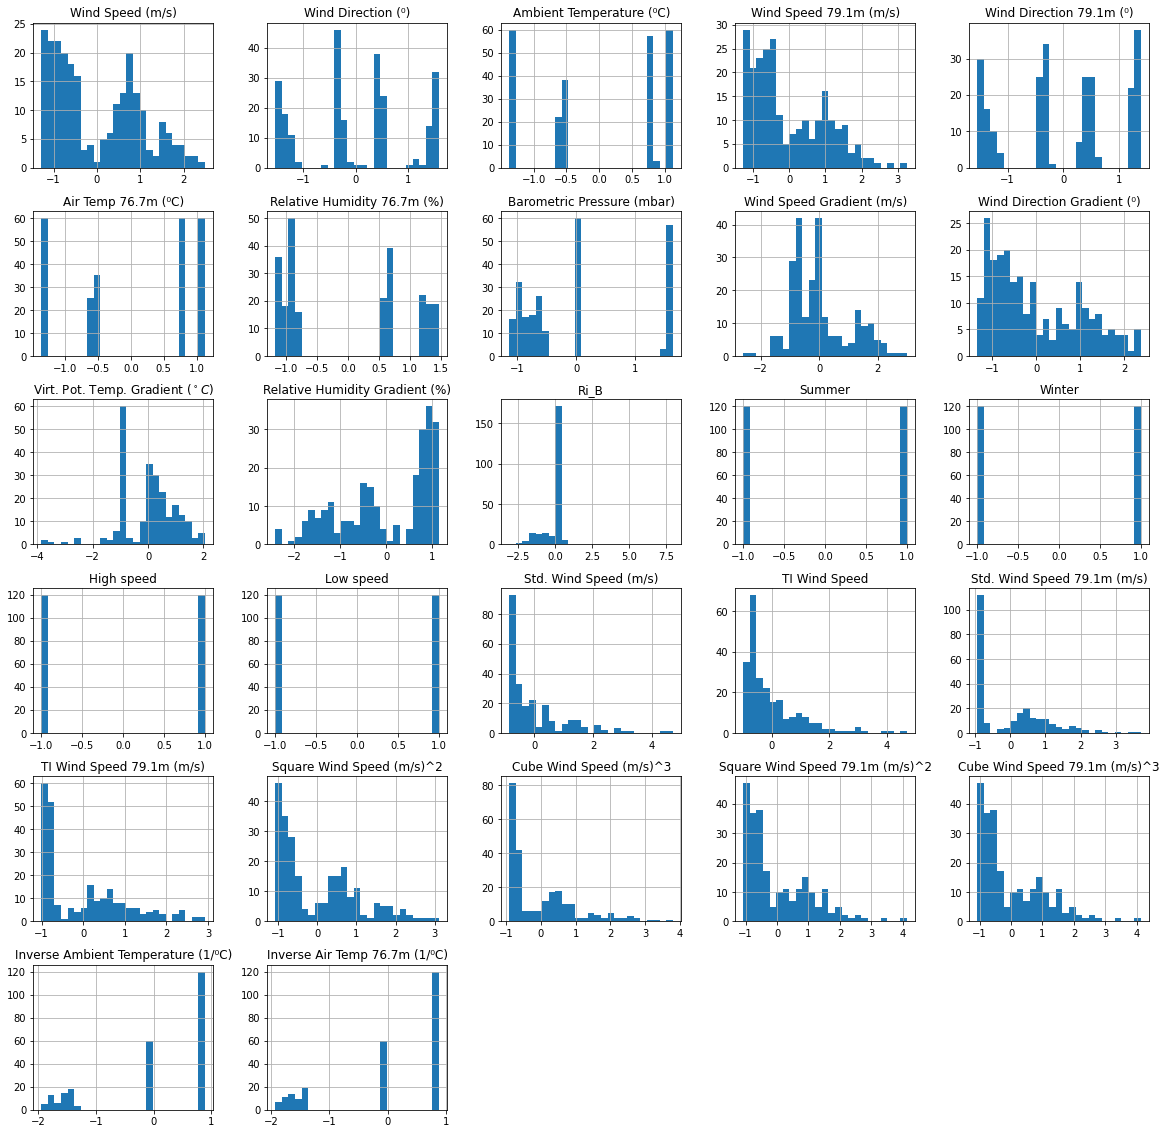

In [348]:
x_scaled_check_df=pd.DataFrame(x_scaled,columns=x.columns)
hist=x_scaled_check_df.hist(bins=25,figsize=[20,20])

### Repeating standardizing for the log dataframe

In [349]:
x_log = df_log.drop(['Real Power (kW)','Ri_B'], axis =1)
y_log=df_log['Real Power (kW)']

x_scaled_log=preprocessing.scale(x_log, axis=0, with_mean=True, with_std=True, copy=True)

In [350]:
x_scaled_log.mean(axis=0)

array([ 5.14403335e-16,  1.18423789e-15, -3.07901852e-15,  8.06762065e-16,
        4.61852778e-15, -4.85537536e-15, -1.12502600e-15, -1.55904919e-13,
       -1.18423789e-16,  7.40148683e-18,  2.07241631e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.77635684e-16, -1.33226763e-16,  5.92118946e-17, -1.62832710e-16,
        4.73695157e-16, -7.40148683e-18,  8.14163551e-16,  8.14163551e-16,
       -7.69754630e-16, -1.18423789e-16])

In [351]:
x_scaled_log.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Splitting into training and testing datasets

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [353]:
X_train.shape, X_test.shape

((180, 27), (60, 27))

In [354]:
y_train.shape, y_test.shape

((180,), (60,))

### Repeating standardizing for the log dataframe

In [355]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_scaled_log, y_log, test_size=0.25)

In [356]:
X_train_log.shape, X_test_log.shape

((180, 26), (60, 26))

In [357]:
y_train_log.shape, y_test_log.shape

((180,), (60,))

# Step 5 - Modeling

### **The Data Science Method**  

1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with Training Data Set

For this project, Wind Turbine Power produced is the response variable, and other features, such as speed, are the explanatory variables. Since data for Power produced is provided we can utilize Supervised Learning Machine Learning algorithms to construct the models to predict turbine power.

Two types of models will be evaluated:
1. Ordinary Least Square model
2. Random Forest Regressor model

For each model different number of features will be considered along with tunning of hyperparameters wherever applicable. 

#### Importing relevant libraries

In [358]:
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # for OLS
from statsmodels.graphics.api import abline_plot # What does this do? "Plot a line given an intercept and slope."
from sklearn.metrics import mean_squared_error, r2_score # What does this do? "Mean squared error regression loss".
#"R^2 (coefficient of determination) regression score function.
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model #that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0."

### Fitting Models

**<font color='teal'>  1a. Making the Ordinary Least Squares (OLS) model with all features. </font>**

In [359]:
#Adding constant required for processnig OLS
x_scaled_OLS=sm.add_constant(x_scaled)

In [360]:
# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(x_scaled_OLS, y, test_size=0.25, random_state=42)

In [361]:
# Create the model
model_ols = sm.OLS(y_train,X_train)

# Fit the model with fit() 
results=model_ols.fit() 

In [362]:
# Evaluate the model with .summary()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Real Power (kW)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     689.5
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          9.45e-145
Time:                        19:08:48   Log-Likelihood:                -1045.1
No. Observations:                 180   AIC:                             2140.
Df Residuals:                     155   BIC:                             2220.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1125.5083      6.532    172.312      0.000    1112.605    1138.411
x1         -3501.9091    476.482     -7.350      0.000   -4443.146   -2560.673
x2             3.3125     28.433      0.117      0.907     -52.853      59.478
x3         -1030.1720   1383.608     -0.745      0.458   -3763.334    1702.990
x4           139.0296    168.702      0.824      0.411    -194.222     472.282
x5          -249.1432    105.473     -2.362      0.019    -457.494     -40.793
x6          2369.7558   1549.491      1.529      0.128    -691.088    5430.599
x7          -212.5127    167.860     -1.266      0.207    -544.102     119.077
x8           -68.9407    173.812     -0.397      0.692    -412.287     274.406
x9            18.1100     15.694      1.154      0.250     -12.892      49.112
x10          -30.1577     14.924     -2.021      0.045     -59.639      -0.677
x11            2.6694     18.565      0.144      0.886     -34.003      39.342
x12            5.4967     40.149      0.137      0.891     -73.812      84.806
x13          -11.9024      8.367     -1.423      0.157     -28.430       4.626
x14         -894.6210    468.820     -1.908      0.058   -1820.722      31.480
x15          894.6210    468.820      1.908      0.058     -31.480    1820.722
x16         -186.0292     81.275     -2.289      0.023    -346.580     -25.479
x17          186.0292     81.275      2.289      0.023      25.479     346.580
x18         -132.3242     55.903     -2.367      0.019    -242.755     -21.894
x19          129.1531     50.351      2.565      0.011      29.691     228.615
x20         -229.7222     89.932     -2.554      0.012    -407.373     -52.072
x21          211.6951     87.666      2.415      0.017      38.520     384.870
x22         8756.2745    898.449      9.746      0.000    6981.490    1.05e+04
x23        -4900.6386    461.247    -10.625      0.000   -5811.780   -3989.497
x24          105.5120     70.078      1.506      0.134     -32.919     243.943
x25          105.5120     70.078      1.506      0.134     -32.919     243.943
x26           65.2432    257.044      0.254      0.800    -442.518     573.005
x27          -67.4932    335.200     -0.201      0.841    -729.643     594.657
==============================================================================
Omnibus:                       25.575   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.592
Skew:                           0.501   Prob(JB):                     8.59e-18
Kurtosis:                       6.078   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indic

The OLS model Adjusted $R^2$ is 0.989 a significant improvement over the physics-based model that had an Adjusted $R^2$ of 0.93.

In [363]:
# Using the new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter


y_pred_ols = results.predict(X_test)

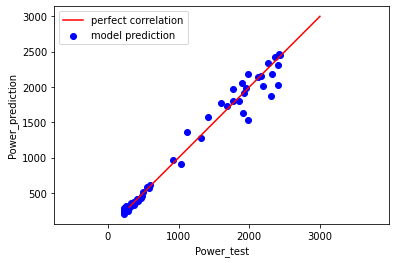

In [364]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y_test, y_pred_ols, color ='b', label='model prediction') 



# Add a line for perfect correlation. Can you see what this line is doing? Use plot()

_ = plt.plot([300,3000], [300,3000], color ='r', label='perfect correlation') 

# Label it nicely

_ = plt.xlabel('Power_test')
_ = plt.ylabel('Power_prediction') 
_ = plt.axis('equal')
_ = plt.legend()

plt.show()

[0.5800000000000003, 0.9014293307826042]

<Figure size 720x504 with 0 Axes>

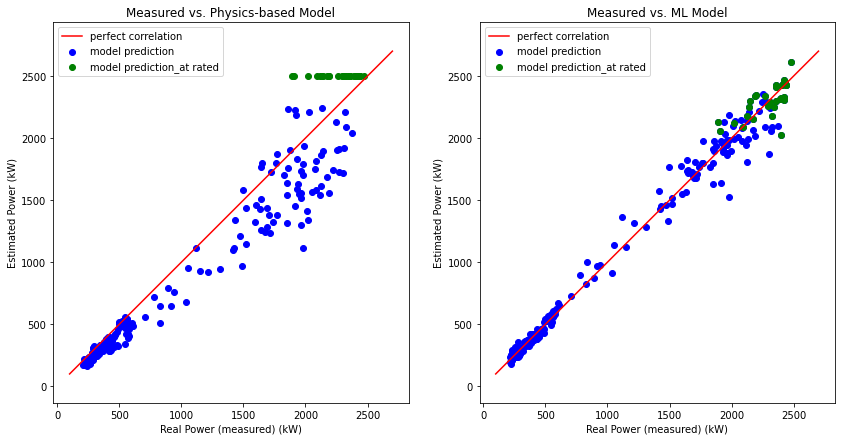

<Figure size 504x504 with 0 Axes>

In [365]:
# Compare physics-based model with OLS model

def comparer(df,y_pred_ols_all,y): 
    df_test1=df.loc[df['Wind Speed (m/s)']<12 ] #12
    df_test=df_test1.loc[df['Real Power (kW)']<2500 ] #2500
    x_test_array=np.array(df_test[['Wind Speed (m/s)', 'Ambient Temperature (⁰C)', 'Barometric Pressure (mbar)']].values)
    y_test_array=np.array(df_test[['Real Power (kW)']].values)[:,0]
    
    #from eq. 5
    #Note: pressure is multiplied by 100 to convert mbar to Pa
    #Note: 273 is added to temperature to convert C to K
    
    density_estimate=0.0035*(x_test_array[:,2]*100)/(x_test_array[:,1]+273)
    cp_array= np.arange(0.3, 0.59, 0.01)
    P_est=[]
    count=0
    vect_adj_R2=[]
    
    for cp in cp_array:
        #from eq. 1
        #1/1000 factor multiplication to convert W to kW 
        P_line=(1/1000)*1/2*cp*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3) 
        P_est.append(P_line)
        count=count+1
        #estimating  adj_R2
        R2=1-((1/len(P_line))*np.sum(np.power((y_test_array-np.array(P_line)),2))/np.var(y_test_array))
        adj_R2=1-((1-R2)*(len(P_line)-1)/(len(P_line)-3-1))
        vect_adj_R2.append(adj_R2)
        
        P_est_np=np.array(P_est)
        
        maxpos = vect_adj_R2.index(max(vect_adj_R2))
    
    
    
    #values at rated
    df_rated=df.loc[df['Wind Speed (m/s)']>=12 ]
    y_test_array_at_rated=np.array(df_rated[['Real Power (kW)']].values)[:,0]
    P_phy_model_optCp_at_rated=2500*np.ones(len(y_test_array_at_rated))
    
    mask=df['Wind Speed (m/s)']>=12
    y_rated=y.loc[mask]
    y_pred_ols_all_rated=y_pred_ols_all[mask]
    #code above for values at rated
        
    P_phy_model_optCp=(1/1000)*1/2*cp_array[maxpos]*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3)
    P_phy_model_optCp[P_phy_model_optCp>2500]=2500
    
    plt.figure(figsize=(10,7))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
    
    ax1.plot([100,2700], [100,2700], color ='r', label='perfect correlation')
    ax1.scatter(y_test_array,P_phy_model_optCp,color ='b')
    ax1.scatter(y_test_array_at_rated,P_phy_model_optCp_at_rated,color ='g')
    
    ax1.set(xlabel='Real Power (measured) (kW)', ylabel='Estimated Power (kW)', title='Measured vs. Physics-based Model')
    ax1.legend(['perfect correlation','model prediction','model prediction_at rated'])
    ax1.axis('equal')
    
    speed_array= np.arange(4, 13, 0.1)
    speed_array=np.append(speed_array, 14)
    P_phy_model=(1/1000)*1/2*cp_array[maxpos]*np.mean(density_estimate)*7.24e3*(speed_array**3) 
    speed_array2= np.arange(12, 16.5, 0.1)
    P_phy_model2=2500*np.ones(len(speed_array2)) 
    
    plt.figure(figsize=(7,7))
    ax2.plot([100,2700], [100,2700], color ='r', label='perfect correlation')
    ax2.scatter(y, y_pred_ols_all, color ='b', label='model prediction')
    ax2.scatter(y_rated, y_pred_ols_all_rated, color ='g', label='model prediction_at rated')
    ax2.set(xlabel='Real Power (measured) (kW)', ylabel='Estimated Power (kW)', title='Measured vs. ML Model')
    ax2.legend(['perfect correlation','model prediction','model prediction_at rated'])
    ax2.axis('equal')
    
    output=[cp_array[maxpos], vect_adj_R2[maxpos]]
    return output
    

#predicting all data
y_pred_ols_all = results.predict(x_scaled_OLS)
    
#side-by-side comparison of all data
    
comparer(df,y_pred_ols_all,y)

The prediction improvement is evident in the measured vs. prediction plots. As shown in the left panel, the physics-based model seems to overpredict the power produced in Region II (below rated power), and has worse performance at higher wind speeds (**<font color='blue'> blue dots </font>**). The physics-based model is unable to predict power in Region III (rated power) because the turbine is regulated (**<font color='green'> green dots </font>**). As shown in the right panel, the OLS model is robust enough to predict power even in Region III (**<font color='green'> green dots </font>**). Further, a fitting-based estimate of turbine efficiency $Cp$ was not needed for OLS model prediction.

#### Checking feature contribution to the model. 

In [366]:
feature_names=x.columns.values
data=abs(results.params)
data=np.array(data)
#For retrieving the slope:
coeff_df=pd.DataFrame(data[1:29],index=feature_names,columns=['abs linear coeff'])
coeff_df.sort_values(by=['abs linear coeff'],ascending=False)

,abs linear coeff
Square Wind Speed (m/s)^2,8756.274484
Cube Wind Speed (m/s)^3,4900.638568
Wind Speed (m/s),3501.909110
Air Temp 76.7m (⁰C),2369.755820
Ambient Temperature (⁰C),1030.172012
Winter,894.621010
Summer,894.621010
Wind Direction 79.1m (⁰),249.143209
Std. Wind Speed 79.1m (m/s),229.722160
Relative Humidity 76.7m (%),212.512684


The 'square of wind speed' feature has the highest contribution followed by 'cube of wind speed' and 'wind speed'. This is unlike the case of the physics-based model that uses only the 'cube of wind speed' feature, and is independent of wind speed above rated values. Perhaps, a polynomial in the form of various 'wind speed' power creates a robust model that has superior prediction in Region II as well as III. 

'Air Temperature' measurements are the next significant explanatory variables. This is expected, since air density is a function of temperature. However, the feature associated with pressure is not a significant contributor, perhaps because it does not vary much in proportion numerically. 

The classification features  that were created to delineate seasons, 'Winter' and 'Summer' follow temperature in terms of contribution. The modelling process reveals their relative importance.

The spatial gradient features that were engineered did not seem to have a significant contribution towards prediction.



**<font color='teal'>  1b. Making the Ordinary Least Squares (OLS) model without features representing measurements on the upstream tower . </font>**

In [367]:
x_wo_UpTower = df.drop(['Real Power (kW)'], axis =1)

In [368]:
x_wo_UpTower.columns


Index(['Wind Speed (m/s)', 'Wind Direction (⁰)', 'Ambient Temperature (⁰C)',
       'Wind Speed 79.1m (m/s)', 'Wind Direction 79.1m (⁰)',
       'Air Temp 76.7m (⁰C)', 'Relative Humidity 76.7m (%)',
       'Barometric Pressure (mbar)', 'Wind Speed Gradient (m/s)',
       'Wind Direction Gradient (⁰)', 'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B', 'Summer', 'Winter',
       'High speed', 'Low speed', 'Std. Wind Speed (m/s)', 'TI Wind Speed',
       'Std. Wind Speed 79.1m (m/s)', 'TI Wind Speed 79.1m (m/s)',
       'Square Wind Speed (m/s)^2', 'Cube Wind Speed (m/s)^3',
       'Square Wind Speed 79.1m (m/s)^2', 'Cube Wind Speed 79.1m (m/s)^3',
       'Inverse Ambient Temperature (1/⁰C)', 'Inverse Air Temp 76.7m (1/⁰C)'],
      dtype='object')

In [369]:
colTodrop=['Wind Speed 79.1m (m/s)', 'Wind Direction 79.1m (⁰)',
       'Air Temp 76.7m (⁰C)', 'Relative Humidity 76.7m (%)',
       'Barometric Pressure (mbar)', 'Wind Speed Gradient (m/s)',
       'Wind Direction Gradient (⁰)', 'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B','Std. Wind Speed 79.1m (m/s)', 'TI Wind Speed 79.1m (m/s)','Square Wind Speed 79.1m (m/s)^2', 'Cube Wind Speed 79.1m (m/s)^3',
       'Inverse Ambient Temperature (1/⁰C)']

In [370]:
x_wo_UpTower = x_wo_UpTower.drop(colTodrop, axis =1)
x_wo_UpTower.columns

Index(['Wind Speed (m/s)', 'Wind Direction (⁰)', 'Ambient Temperature (⁰C)',
       'Summer', 'Winter', 'High speed', 'Low speed', 'Std. Wind Speed (m/s)',
       'TI Wind Speed', 'Square Wind Speed (m/s)^2', 'Cube Wind Speed (m/s)^3',
       'Inverse Air Temp 76.7m (1/⁰C)'],
      dtype='object')

In [371]:
y_wo_UpTower=df['Real Power (kW)']

#model perparing steps
x_wo_UpTower_scaled=preprocessing.scale(x_wo_UpTower, axis=0, with_mean=True, with_std=True, copy=True)

In [372]:
#Adding constant required for processnig OLS
x_wo_UpTower_scaled_OLS=sm.add_constant(x_wo_UpTower_scaled)

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(x_wo_UpTower_scaled_OLS, y, test_size=0.25, random_state=42)

In [373]:
# Create the model
model_ols_wo = sm.OLS(y_train,X_train)

# Fit the model with fit() 
results_wo=model_ols_wo.fit() 

In [374]:
# Evaluate the model with .summary()
results_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Real Power (kW)   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     770.8
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          2.27e-135
Time:                        19:08:49   Log-Likelihood:                -1120.5
No. Observations:                 180   AIC:                             2263.
Df Residuals:                     169   BIC:                             2298.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1124.6871      9.454    118.969      0.000    1106.025    1143.349
x1         -3184.1528    477.078     -6.674      0.000   -4125.952   -2242.354
x2           -56.2979     37.352     -1.507      0.134    -130.034      17.439
x3          -549.4046    529.623     -1.037      0.301   -1594.934     496.125
x4           273.1672    326.534      0.837      0.404    -371.444     917.779
x5          -273.1672    326.534     -0.837      0.404    -917.779     371.444
x6            41.1064     40.156      1.024      0.307     -38.165     120.378
x7           -41.1064     40.156     -1.024      0.307    -120.378      38.165
x8          -123.4639     74.582     -1.655      0.100    -270.696      23.768
x9           130.5354     68.296      1.911      0.058      -4.289     265.359
x10         8634.8647    973.083      8.874      0.000    6713.901    1.06e+04
x11        -4658.4640    498.124     -9.352      0.000   -5641.812   -3675.116
x12          -52.5139    180.483     -0.291      0.771    -408.805     303.777
==============================================================================
Omnibus:                       10.491   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               23.844
Skew:                           0.063   Prob(JB):                     6.64e-06
Kurtosis:                       4.779   Cond. No.                     1.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [375]:
# Using the new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter


y_pred_ols_wo = results_wo.predict(X_test)

(81.50749999999991, 3138.9758333333334, 73.5513476987112, 3139.354697728633)

<Figure size 720x504 with 0 Axes>

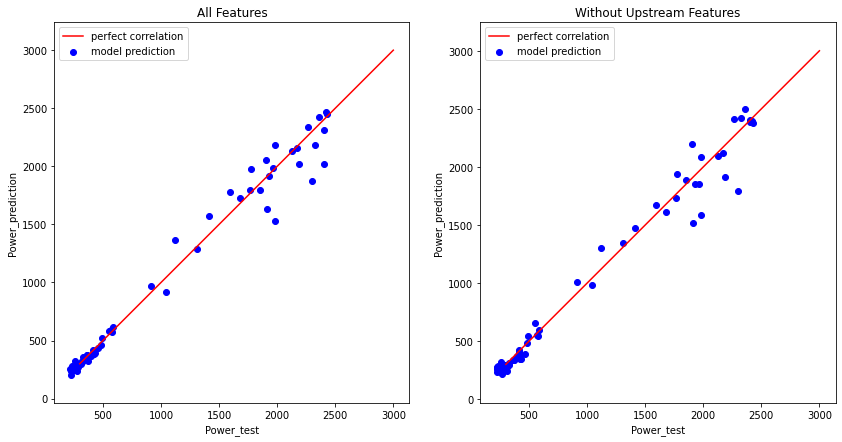

In [376]:
# Plot the predictions
# Build a scatterplot

plt.figure(figsize=(10,7))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
    
ax1.scatter(y_test, y_pred_ols, color ='b', label='model prediction')
ax1.plot([300,3000], [300,3000], color ='r', label='perfect correlation') 
    
ax1.set(xlabel='Power_test', ylabel='Power_prediction', title='All Features')
ax1.legend(['perfect correlation','model prediction'])
ax1.axis('equal')
    

ax2.scatter(y_test, y_pred_ols_wo, color ='b', label='model prediction')
ax2.plot([300,3000], [300,3000], color ='r', label='perfect correlation') 
    
ax2.set(xlabel='Power_test', ylabel='Power_prediction', title='Without Upstream Features')
ax2.legend(['perfect correlation','model prediction',])
ax2.axis('equal')
    


[0.5800000000000003, 0.9014293307826042]

<Figure size 720x504 with 0 Axes>

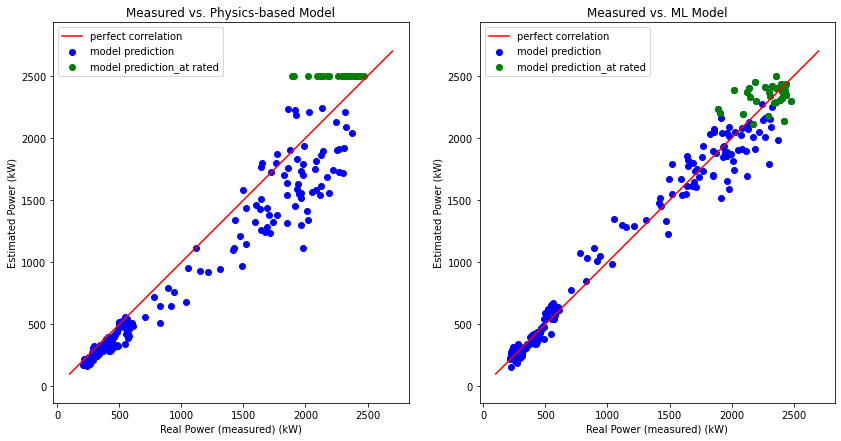

<Figure size 504x504 with 0 Axes>

In [377]:
# Compare physics-based model with OLS model created using limited features 

#predicting all data
y_pred_ols_wo_all = results_wo.predict(x_wo_UpTower_scaled_OLS)
    
#side-by-side comparison of all data 
    
comparer(df,y_pred_ols_wo_all,y)

#### Checking feature contribution to the model. 

In [378]:
feature_names_wo=x_wo_UpTower.columns.values
data_wo=abs(results_wo.params)
data_wo=np.array(data_wo)
#For retrieving the slope:
coeff_df_wo=pd.DataFrame(data_wo[1:29],index=feature_names_wo,columns=['abs linear coeff'])
coeff_df_wo.sort_values(by=['abs linear coeff'],ascending=False)

,abs linear coeff
Square Wind Speed (m/s)^2,8634.864738
Cube Wind Speed (m/s)^3,4658.463973
Wind Speed (m/s),3184.152838
Ambient Temperature (⁰C),549.404552
Winter,273.167160
Summer,273.167160
TI Wind Speed,130.535358
Std. Wind Speed (m/s),123.463946
Wind Direction (⁰),56.297909
Inverse Air Temp 76.7m (1/⁰C),52.513854


The model built with features limited to typically available measurements, and without any additional measurements from upstream tower has a Adjusted_$R^2=0.977$, is slightly lower than the previous model that had all the features, however still significantly higher than the Adjusted_$R^2=0.93$ of the physics-based model.

This model is also able to make prediction in turbine operation Region III that corresponds to rated power.

Further, the relative feature contribution to the model is similar to the previous OLS model. 

**<font color='teal'>  2a. Making the Random Forest Regressor model with all features. </font>**

In [436]:
#Preparing data

x = df.drop(['Real Power (kW)'], axis =1)
y=df['Real Power (kW)']

x_scaled=preprocessing.scale(x, axis=0, with_mean=True, with_std=True, copy=True)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [437]:
# Creating the RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=1, n_estimators=10)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9793819707190449

In [438]:
# Preparing framework for Bayesian Optimization

def train_model(n_estimators, 
                max_depth,
                min_samples_split, 
                min_samples_leaf 
                ):

    params = {
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf':int(min_samples_leaf)
        }
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [439]:
bounds = {
    'n_estimators':(10,400),
    'max_depth':(5,20),
    'min_samples_split': (2,10),
    'min_samples_leaf':(1,10)
}

In [440]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    
    random_state=1,
)
optimizer.maximize(init_points=50, n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9744   |  11.26    |  7.483    |  2.001    |  127.9    |
|  2        |  0.9792   |  7.201    |  1.831    |  3.49     |  144.8    |
|  3        |  0.9765   |  10.95    |  5.849    |  5.354    |  277.2    |
|  4        |  0.9728   |  8.067    |  8.903    |  2.219    |  271.5    |
|  5        |  0.9754   |  11.26    |  6.028    |  3.123    |  87.26    |
|  6        |  0.9727   |  17.01    |  9.714    |  4.507    |  280.0    |
|  7        |  0.9747   |  18.15    |  9.051    |  2.68     |  25.23    |
|  8        |  0.9726   |  7.547    |  8.903    |  2.787    |  174.2    |
|  9        |  0.9767   |  19.37    |  5.798    |  7.535    |  133.1    |
|  10       |  0.9737   |  15.3     |  8.512    |  2.146    |  302.6    |
|  11       |  0.9745   |  19.83    |  7.733    |  4.244    |  317.8    |
|  12       |  0.9749   |  6.548    | 

 **<font color='teal'> Print the best result by using the '.max' function.</font>**

In [441]:
optimizer.max

{'target': 0.9796788491198688,
 'params': {'max_depth': 8.174421740000886,
  'min_samples_leaf': 3.389919934350036,
  'min_samples_split': 5.932585274242706,
  'n_estimators': 30.81139259566135}}

In [443]:
regressor = RandomForestRegressor(random_state=1, max_depth=8,
  min_samples_leaf= 3,
  min_samples_split= 6,
  n_estimators= 31)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.97652760264034

**<font color='teal'>  2b. Making the Random Forest Regressor model without upstream tower measuremet features. </font>**

In [385]:
#preparing data

X_train, X_test, y_train, y_test = train_test_split(x_wo_UpTower_scaled, y, test_size=0.25, random_state=42)

In [386]:
#applying the optimizer

optimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=50, n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9725   |  11.26    |  7.483    |  2.001    |  127.9    |
|  2        |  0.9725   |  7.201    |  1.831    |  3.49     |  144.8    |
|  3        |  0.9745   |  10.95    |  5.849    |  5.354    |  277.2    |
|  4        |  0.9722   |  8.067    |  8.903    |  2.219    |  271.5    |
|  5        |  0.9726   |  11.26    |  6.028    |  3.123    |  87.26    |
|  6        |  0.9707   |  17.01    |  9.714    |  4.507    |  280.0    |
|  7        |  0.9674   |  18.15    |  9.051    |  2.68     |  25.23    |
|  8        |  0.972    |  7.547    |  8.903    |  2.787    |  174.2    |
|  9        |  0.9738   |  19.37    |  5.798    |  7.535    |  133.1    |
|  10       |  0.9729   |  15.3     |  8.512    |  2.146    |  302.6    |
|  11       |  0.9735   |  19.83    |  7.733    |  4.244    |  317.8    |
|  12       |  0.9745   |  6.548    | 

In [387]:
optimizer.max

{'target': 0.9753306404802536,
 'params': {'max_depth': 18.91262870594051,
  'min_samples_leaf': 4.129892737709559,
  'min_samples_split': 8.006496825089243,
  'n_estimators': 293.13921428667607}}

### The Random Forest Regressor model's performance is better than the physics-based model, however, is slightly lower than the OLS models for both cases.

**<font color='teal'>  1c. Building the OLS model for the log Dataframe below to test if it performs any better. </font>** 

In [388]:
#preparing data

x_scaled_OLS_log=sm.add_constant(x_scaled_log)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_scaled_OLS_log, y_log, test_size=0.25)

In [389]:
# Create the model
model_ols_log = sm.OLS(y_train_log,X_train_log)

# Fit the model with fit() 
results=model_ols_log.fit() 

In [390]:
# Evaluate the model with .summary()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Real Power (kW)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     537.3
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          1.03e-133
Time:                        19:09:27   Log-Likelihood:                 286.10
No. Observations:                 180   AIC:                            -534.2
Df Residuals:                     161   BIC:                            -473.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9005      0.004    737.457      0.000       2.893       2.908
x1             0.1065      0.009     12.010      0.000       0.089       0.124
x2            -0.0130      0.021     -0.608      0.544      -0.055       0.029
x3            -2.0149      0.771     -2.614      0.010      -3.537      -0.493
x4             0.0045      0.006      0.792      0.429      -0.007       0.016
x5            -0.1371      0.070     -1.968      0.051      -0.275       0.000
x6             2.0882      0.972      2.149      0.033       0.170       4.007
x7             0.1130      0.080      1.417      0.158      -0.044       0.270
x8             0.3599      0.132      2.732      0.007       0.100       0.620
x9            -0.0039      0.006     -0.651      0.516      -0.016       0.008
x10           -0.0175      0.007     -2.433      0.016      -0.032      -0.003
x11            0.0011      0.006      0.164      0.870      -0.012       0.014
x12           -0.0084      0.011     -0.758      0.449      -0.030       0.013
x13            0.1060      0.325      0.326      0.745      -0.536       0.748
x14           -0.1060      0.325     -0.326      0.745      -0.748       0.536
x15            0.1035      0.073      1.428      0.155      -0.040       0.247
x16           -0.1035      0.073     -1.428      0.155      -0.247       0.040
x17            0.0258      0.004      6.336      0.000       0.018       0.034
x18           -0.0109      0.004     -2.632      0.009      -0.019      -0.003
x19           -0.0056      0.008     -0.699      0.486      -0.021       0.010
x20           -0.0078      0.009     -0.844      0.400      -0.026       0.010
x21            0.1065      0.009     12.010      0.000       0.089       0.124
x22            0.1065      0.009     12.010      0.000       0.089       0.124
x23            0.0045      0.006      0.792      0.429      -0.007       0.016
x24            0.0045      0.006      0.792      0.429      -0.007       0.016
x25            0.1245      0.193      0.646      0.519      -0.256       0.505
x26            0.0492      0.258      0.191      0.849      -0.460       0.558
==============================================================================
Omnibus:                        5.879   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                7.197
Skew:                          -0.218   Prob(JB):                       0.0274
Kurtosis:                       3.877   Cond. No.                     1.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix 

Taking log of the features has not Necessarily improved the model.



In [391]:
feature_names=x_log.columns.values
data=abs(results.params)
data=np.array(data)
#For retrieving the slope:
coeff_df=pd.DataFrame(data[1:29],index=feature_names,columns=['abs linear coeff'])
coeff_df.sort_values(by=['abs linear coeff'],ascending=False)

,abs linear coeff
Air Temp 76.7m (⁰C),2.088208
Ambient Temperature (⁰C),2.014865
Barometric Pressure (mbar),0.359926
Wind Direction 79.1m (⁰),0.137066
Inverse Ambient Temperature (1/⁰C),0.124491
Relative Humidity 76.7m (%),0.112962
Wind Speed (m/s),0.106543
Square Wind Speed (m/s)^2,0.106543
Cube Wind Speed (m/s)^3,0.106543
Summer,0.106050


**<font color='teal'>  1d. Building the OLS model OLS with limited features on the log data. </font>** 

In [392]:
#preparing data

x_log_woUP = df_log.drop(['Real Power (kW)'], axis =1)
x_log_woUP = x_log_woUP.drop(colTodrop, axis =1)
y_log=df_log['Real Power (kW)']

x_scaled_log_woUP=preprocessing.scale(x_log_woUP, axis=0, with_mean=True, with_std=True, copy=True)



In [393]:
x_scaled_OLS_log_woUP=sm.add_constant(x_scaled_log_woUP)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_scaled_OLS_log_woUP, y_log, test_size=0.25)

In [394]:
# Create the model
model_ols_log_woUP = sm.OLS(y_train_log,X_train_log)

# Fit the model with fit() 
results=model_ols_log_woUP.fit() 

In [395]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Real Power (kW)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1311.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          1.21e-145
Time:                        19:09:27   Log-Likelihood:                 278.46
No. Observations:                 180   AIC:                            -540.9
Df Residuals:                     172   BIC:                            -515.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9007      0.004    734.648      0.000       2.893       2.908
x1             0.1161      0.004     29.411      0.000       0.108       0.124
x2            -0.0066      0.016     -0.407      0.684      -0.038       0.025
x3            -0.0753      0.297     -0.254      0.800      -0.662       0.511
x4             0.0147      0.164      0.090      0.929      -0.308       0.338
x5            -0.0147      0.164     -0.090      0.929      -0.338       0.308
x6             0.0344      0.027      1.271      0.205      -0.019       0.088
x7            -0.0344      0.027     -1.271      0.205      -0.088       0.019
x8             0.0311      0.004      8.393      0.000       0.024       0.038
x9            -0.0081      0.004     -1.957      0.052      -0.016    7.14e-05
x10            0.1161      0.004     29.411      0.000       0.108       0.124
x11            0.1161      0.004     29.411      0.000       0.108       0.124
x12           -0.0669      0.071     -0.947      0.345      -0.206       0.073
==============================================================================
Omnibus:                        4.701   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                5.485
Skew:                          -0.170   Prob(JB):                       0.0644
Kurtosis:                       3.785   Cond. No.                     1.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.03e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [396]:
feature_names_wo=x_wo_UpTower.columns.values
data_wo=abs(results.params)
data_wo=np.array(data_wo)
#For retrieving the slope:
coeff_df_wo=pd.DataFrame(data_wo[1:29],index=feature_names_wo,columns=['abs linear coeff'])
coeff_df_wo.sort_values(by=['abs linear coeff'],ascending=False)

,abs linear coeff
Wind Speed (m/s),0.116065
Square Wind Speed (m/s)^2,0.116065
Cube Wind Speed (m/s)^3,0.116065
Ambient Temperature (⁰C),0.075319
Inverse Air Temp 76.7m (1/⁰C),0.066911
Low speed,0.034403
High speed,0.034403
Std. Wind Speed (m/s),0.031079
Summer,0.014682
Winter,0.014682


The model performance with log of features is marginally better than without log of the data. The order of feature contributions however is different. In this case the log dataframe the 'Ambient Temperature' features carry the most weight. The seasonal classification 'Winter' vs. 'Summer' are the next important features, emphasizing the engineering of these features. These are followed by velocity and its various powers. Further, it is noted that the feature order with all data and without upstream tower data is not consistent. 

**<font color='teal'>  2c. Making the Random Forest Regressor model with all features for log of data. </font>**

In [397]:
#preparing data

X_train, X_test, y_train, y_test = train_test_split(x_scaled_log, y_log, test_size=0.25)

In [398]:
#applying the optimizer

optimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=50, n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9904   |  11.26    |  7.483    |  2.001    |  127.9    |
|  2        |  0.9943   |  7.201    |  1.831    |  3.49     |  144.8    |
|  3        |  0.9924   |  10.95    |  5.849    |  5.354    |  277.2    |
|  4        |  0.989    |  8.067    |  8.903    |  2.219    |  271.5    |
|  5        |  0.9908   |  11.26    |  6.028    |  3.123    |  87.26    |
|  6        |  0.9884   |  17.01    |  9.714    |  4.507    |  280.0    |
|  7        |  0.988    |  18.15    |  9.051    |  2.68     |  25.23    |
|  8        |  0.9896   |  7.547    |  8.903    |  2.787    |  174.2    |
|  9        |  0.9926   |  19.37    |  5.798    |  7.535    |  133.1    |
|  10       |  0.9895   |  15.3     |  8.512    |  2.146    |  302.6    |
|  11       |  0.9904   |  19.83    |  7.733    |  4.244    |  317.8    |
|  12       |  0.9926   |  6.548    | 

In [399]:
optimizer.max

{'target': 0.9946261930852625,
 'params': {'max_depth': 7.3518709196912635,
  'min_samples_leaf': 1.1671858195966855,
  'min_samples_split': 2.5601771497537786,
  'n_estimators': 199.6745932654424}}

In [ ]:
y_pred_RF_log_all = results.predict(X_test)

**<font color='teal'>  2d. Making the Random Forest Regressor model without upstream tower features for log of data. </font>**

In [400]:
#preparing data

x_log_woUP = df_log.drop(['Real Power (kW)'], axis =1)
x_log_woUP = x_log_woUP.drop(colTodrop, axis =1)
y_log=df_log['Real Power (kW)']

x_scaled_log_woUP=preprocessing.scale(x_log_woUP, axis=0, with_mean=True, with_std=True, copy=True)

X_train, X_test, y_train, y_test = train_test_split(x_scaled_log_woUP, y_log, test_size=0.25)

In [401]:
#applying the optimizer

optimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=50, n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9632   |  11.26    |  7.483    |  2.001    |  127.9    |
|  2        |  0.9844   |  7.201    |  1.831    |  3.49     |  144.8    |
|  3        |  0.9718   |  10.95    |  5.849    |  5.354    |  277.2    |
|  4        |  0.9579   |  8.067    |  8.903    |  2.219    |  271.5    |
|  5        |  0.9677   |  11.26    |  6.028    |  3.123    |  87.26    |
|  6        |  0.9514   |  17.01    |  9.714    |  4.507    |  280.0    |
|  7        |  0.9505   |  18.15    |  9.051    |  2.68     |  25.23    |
|  8        |  0.9597   |  7.547    |  8.903    |  2.787    |  174.2    |
|  9        |  0.9698   |  19.37    |  5.798    |  7.535    |  133.1    |
|  10       |  0.959    |  15.3     |  8.512    |  2.146    |  302.6    |
|  11       |  0.9636   |  19.83    |  7.733    |  4.244    |  317.8    |
|  12       |  0.9722   |  6.548    | 

In [402]:
optimizer.max

{'target': 0.9855113679487034,
 'params': {'max_depth': 19.941398277847203,
  'min_samples_leaf': 1.0588880939683876,
  'min_samples_split': 3.9749027703367643,
  'n_estimators': 80.34860814583371}}

The modelling results are summarized in the table below:

| Model No. |Feature Engineering |Model | Adjusted_$R^2$ or ($R^2$) |
| :- | :- | :-: |-:|
| 0. | All features  |Physics-based | .929
| 1a. | All features |OLS | 0.989 (0.991)
| 1b. | W/O upstream tower |OLS | 0.977 (0.979)
| 1c. | Log of all features |OLS |0.982 (0.984)
| 1d. | W/O upstream tower and log |OLS | 0.981 (0.982)
| 2a. | All features |Random Forest Regressor | (0.969)
| 2b. | W/O upstream tower |Random Forest Regressor| (0.975)
| 2c. | Log of all features |Random Forest Regressor | (0.994)
| 2d. | W/O upstream tower and log |Random Forest Regressor | (0.985)

All machine learning models perform significantly better than the physics-based model. Amongst machine learning models, the Random Forest Regreessor model with log of data for both the case with all features (2c.) and the case without upstream tower measurements (2d.) perform marginally better than the remaining machine learning models.

**<font color='teal'> Applying the Random Forest Model to case 2c.</font>**

In [446]:
# Applying the Random Forest Model to case 2c.

'''{'target': 0.9946261930852625,
 'params': {'max_depth': 7.3518709196912635,
  'min_samples_leaf': 1.1671858195966855,
  'min_samples_split': 2.5601771497537786,
  'n_estimators': 199.6745932654424}}'''
#preparing data

X_train, X_test, y_train, y_test = train_test_split(x_scaled_log, y_log, test_size=0.25)

regressor = RandomForestRegressor(random_state=1, max_depth=7,
  min_samples_leaf= 1,
  min_samples_split= 2,
  n_estimators= 200)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9954421205558557

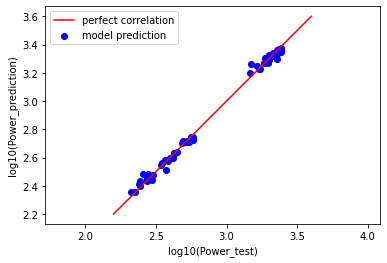

In [449]:
# Plot the predictions

y_pred_rfr = regressor.predict(X_test)

# Build a scatterplot
_ = plt.scatter(y_test, y_pred_rfr, color ='b', label='model prediction') 



# Add a line for perfect correlation. Can you see what this line is doing? Use plot()

_ = plt.plot([2.2,3.6], [2.2,3.6], color ='r', label='perfect correlation') 

# Label it nicely

_ = plt.xlabel('log10(Power_test)')
_ = plt.ylabel('log10(Power_prediction)') 
_ = plt.axis('equal')
_ = plt.legend()

plt.show()

[0.5800000000000003, 0.9014293307826042]

<Figure size 720x504 with 0 Axes>

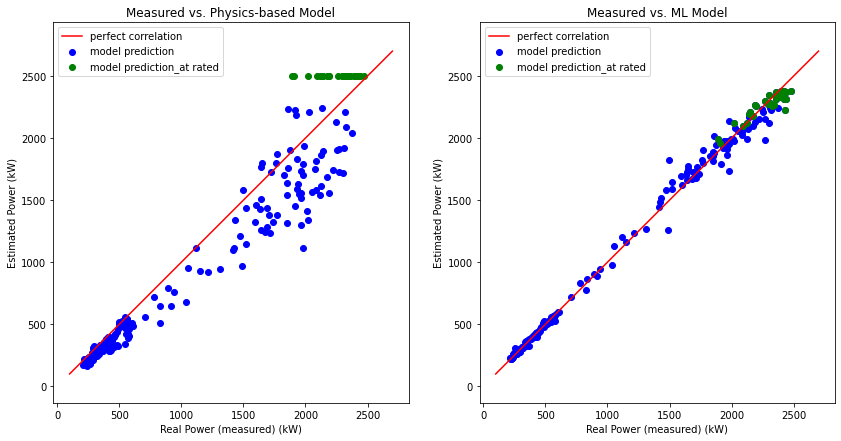

<Figure size 504x504 with 0 Axes>

In [454]:
#predicting all data
y_pred_RFR_all = regressor.predict(x_scaled_log)

y_pred_RFR_all_alog=10**y_pred_RFR_all
y_alog=10**y_log

comparer(df,y_pred_RFR_all_alog,y_alog)

In [456]:
regressor.feature_importances_

array([2.96385662e-01, 3.71149198e-04, 1.45285003e-04, 2.39416651e-02,
       2.58255887e-04, 4.25176249e-04, 9.44207709e-04, 3.60431486e-02,
       3.92761725e-04, 4.57938453e-04, 3.20747380e-04, 1.09880010e-03,
       9.12664338e-06, 1.00528037e-05, 2.64468196e-02, 3.54072323e-02,
       3.55614740e-04, 2.36551977e-04, 3.60869003e-02, 5.01941603e-03,
       2.08737550e-01, 2.81158399e-01, 2.57821598e-02, 1.93364277e-02,
       1.71281216e-04, 4.57670504e-04])

In [458]:
feature_names=x_log.columns.values
data_wo=abs(regressor.feature_importances_)
data_wo=np.array(data_wo)
#For retrieving the slope:
coeff_df_wo=pd.DataFrame(data_wo,index=feature_names,columns=['feature_importances'])
coeff_df_wo.sort_values(by=['feature_importances'],ascending=False)

,feature_importances
Wind Speed (m/s),0.296386
Cube Wind Speed (m/s)^3,0.281158
Square Wind Speed (m/s)^2,0.208738
Std. Wind Speed 79.1m (m/s),0.036087
Barometric Pressure (mbar),0.036043
Low speed,0.035407
High speed,0.026447
Square Wind Speed 79.1m (m/s)^2,0.025782
Wind Speed 79.1m (m/s),0.023942
Cube Wind Speed 79.1m (m/s)^3,0.019336


**<font color='teal'> Applying the Random Forest Model to case 2d.</font>**

In [462]:
#optimized hyper parameters
'''{'target': 0.9855113679487034,
 'params': {'max_depth': 19.941398277847203,
  'min_samples_leaf': 1.0588880939683876,
  'min_samples_split': 3.9749027703367643,
  'n_estimators': 80.34860814583371}}'''

#preparing data

X_train, X_test, y_train, y_test = train_test_split(x_scaled_log_woUP, y_log, test_size=0.25)

regressor = RandomForestRegressor(random_state=1, max_depth=20,
  min_samples_leaf= 1,
  min_samples_split= 4,
  n_estimators= 81)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9887947519482371

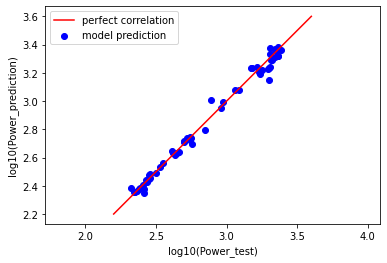

In [463]:
# Plot the predictions

y_pred_rfr = regressor.predict(X_test)

# Build a scatterplot
_ = plt.scatter(y_test, y_pred_rfr, color ='b', label='model prediction') 



# Add a line for perfect correlation. Can you see what this line is doing? Use plot()

_ = plt.plot([2.2,3.6], [2.2,3.6], color ='r', label='perfect correlation') 

# Label it nicely

_ = plt.xlabel('log10(Power_test)')
_ = plt.ylabel('log10(Power_prediction)') 
_ = plt.axis('equal')
_ = plt.legend()

plt.show()

[0.5800000000000003, 0.9014293307826042]

<Figure size 720x504 with 0 Axes>

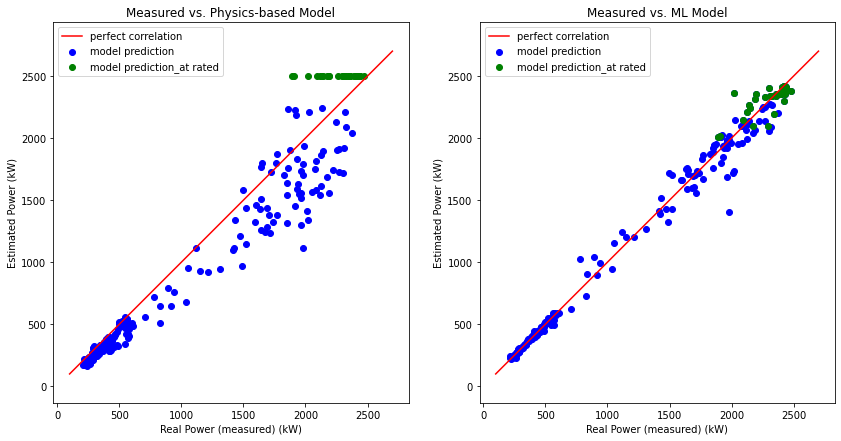

<Figure size 504x504 with 0 Axes>

In [464]:
#predicting all data
y_pred_RFR_all_woUP = regressor.predict(x_scaled_log_woUP)

y_pred_RFR_all_alog_woUP=10**y_pred_RFR_all_woUP
y_alog=10**y_log

comparer(df,y_pred_RFR_all_alog_woUP,y_alog)

In [465]:
feature_names=x_log_woUP.columns.values
data_wo=abs(regressor.feature_importances_)
data_wo=np.array(data_wo)
#For retrieving the slope:
coeff_df_wo=pd.DataFrame(data_wo,index=feature_names,columns=['feature_importances'])
coeff_df_wo.sort_values(by=['feature_importances'],ascending=False)

,feature_importances
Square Wind Speed (m/s)^2,0.339017
Wind Speed (m/s),0.287928
Cube Wind Speed (m/s)^3,0.282584
Low speed,0.056416
High speed,0.022234
Inverse Air Temp 76.7m (1/⁰C),0.003926
Wind Direction (⁰),0.003337
Ambient Temperature (⁰C),0.001752
TI Wind Speed,0.001342
Std. Wind Speed (m/s),0.001311


The above comparison plots show significant prediction improvement when an optimized Random Forest Regressor model is created using log of the data when compared to the physics-based model. The order of feature importance for Random Forest Regressor is different than the relative feature contributions to the OLS model. In all cases, as expected from the physics-based model, the wind speed and its cube and square power are of most importance along with temperature. The additional categorical features that classify the wind speed as 'high' or 'low' and the ones classify the seasons as 'winter' or 'summer' are critical for the Random Forest Regressor and the OLS model, respeectiveee  is of sig of  